<a href="https://colab.research.google.com/github/shash365/iitkgp-aiml/blob/main/2024_03_08_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Lets download the data

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Now, assign the column names to the dataset as follows:

In [3]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

Next, we have to read the dataset using the Pandas data frame as follows:

In [5]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [6]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's implement the very basic step of data preprocessing.

In [7]:
# Separting independent and dependent varibales i.e. labelled data and target

In [10]:
X = data.iloc[:,:-1].values
y = data.iloc[:,4].values

Here, we are dividing the data into train and test splits, with 70% of the training data and 30% of the testing data.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

To check what kind of data is present.. shape, size, values, dtype, type

In [17]:
X_train.shape

(105, 4)

In [18]:
X_test.shape

(45, 4)

In [20]:
X_train[5]

array([5.7, 2.6, 3.5, 1. ])

In [21]:
X_train.dtype

dtype('float64')

In [22]:
print(type(X_train))

<class 'numpy.ndarray'>


Let's do the data scaling.

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Naive Bayes
Now, we are training the model with the help of the GaussianNB class of sklearn as follows:

In [25]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

Let us first test the accuracy of the Naive Bayes classifier over the training dataset.

In [26]:
y_pred = classifier.predict(X_train)

In [27]:
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9523809523809523


For the Naive Bayes classifier, we are achieving an accuracy of 95.24% (approximately) for the training dataset. Therefore, the accuracy is really good on the training dataset.

Now, we have to make the prediction, which can be done in the following way:

In [30]:
y_pred1 = classifier.predict(X_test)

Let's print the results as follows:

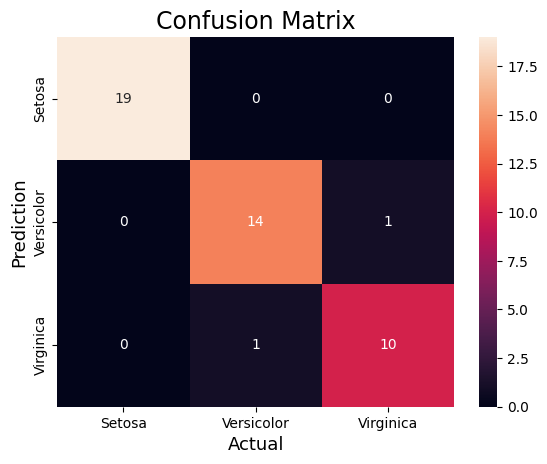

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred1)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor','Virginica'],
            yticklabels=['Setosa','Versicolor','Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix', fontsize=17)
plt.show()

Out of 19 Setosas, 19 have been correctly classified as Setosa. Out of 15 versicolors, 14 have been correctly classified as Versicolor and 1 has been wrongly classified as Virginica. Out of 11 Virginicas, 10 have been correctly classified as Virginica and 1 as Versicolor.

In [32]:
result1 = classification_report(y_test, y_pred1)
print("Classification report")
print(result1)

result2 = accuracy_score(y_test,y_pred1)
print("Accuracy: ", result2)

Classification report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.93      0.93      0.93        15
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45

Accuracy:  0.9555555555555556


We have achieved an accuracy of 95.55% (approximately) using Naive Bayes classifier. Therefore, the accuracy is also good for the test dataset.

As we can see, the accuracies are almost similar for the training and test datasets in the case of the Naive Bayes classifier. Hence, we can also conclude that there are no underfitting or overfitting scenarios.

# Support Vector Machine (SVM)

Let us first test the accuracy of the SVM classifier for different kernels over the training dataset.

In [35]:
# import support vector machine
# "Support Vector Classifier"

from sklearn.svm import SVC
accuracy_list = []

for i in ['linear','poly','rbf','sigmoid']:
  clf = SVC(kernel=i)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_train)
  accuracy = accuracy_score(y_train,y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of "+ i, " is ", float(accuracy))

accuracy of linear  is  0.9619047619047619
accuracy of poly  is  0.8952380952380953
accuracy of rbf  is  0.9619047619047619
accuracy of sigmoid  is  0.9238095238095239


In [36]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

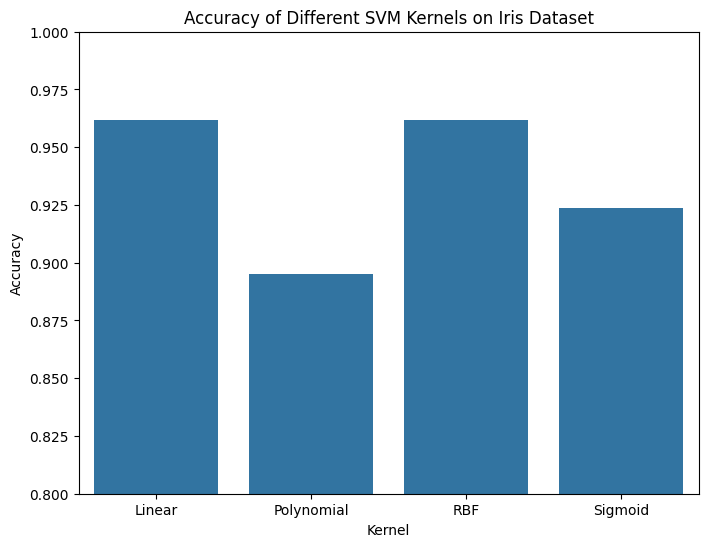

In [37]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.show()

# Now apply for test data

In [38]:
accuracy_list = []

for i in ['linear', 'poly', 'rbf', 'sigmoid']:
  clf = SVC(kernel=i)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)

  print("accuracy of "+ i, "is", float(accuracy))

accuracy of linear is 0.9777777777777777
accuracy of poly is 0.9111111111111111
accuracy of rbf is 1.0
accuracy of sigmoid is 0.9111111111111111


In [39]:
accuracies = {
    'Linear': accuracy_list[0],
    'Polynomial': accuracy_list[1],
    'RBF': accuracy_list[2],
    'Sigmoid': accuracy_list[3]
}

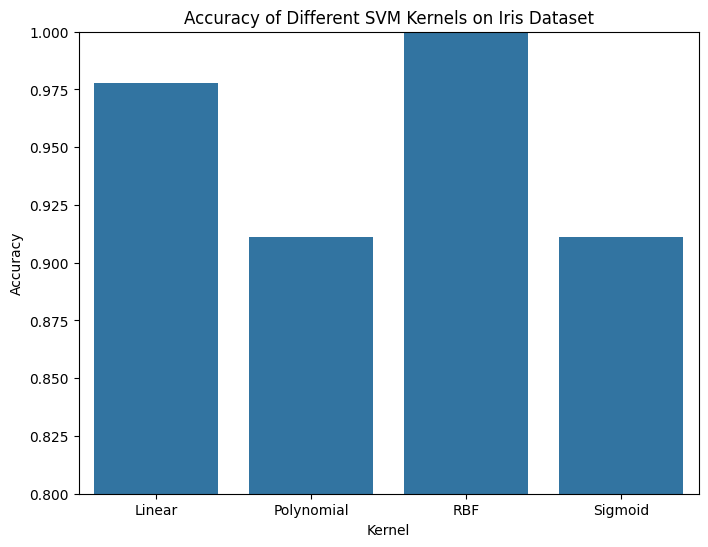

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different SVM Kernels on Iris Dataset')
plt.ylim(0.8, 1.0)  # Set y-axis limits for better visualization
plt.show()

In SVM, we have achieved the highest accuracy with the linear, polynomial and RBF kernels, which are ?%. In the Sigmoid kernel, we have achieved the 2nd highest accuracy, which is ?%. Therefore, the accuracies are really good on the test datasets for the different kernels used by the SVM. We can also conclude that there is no overfitting, as there is not much difference between the training and testing accuracies.

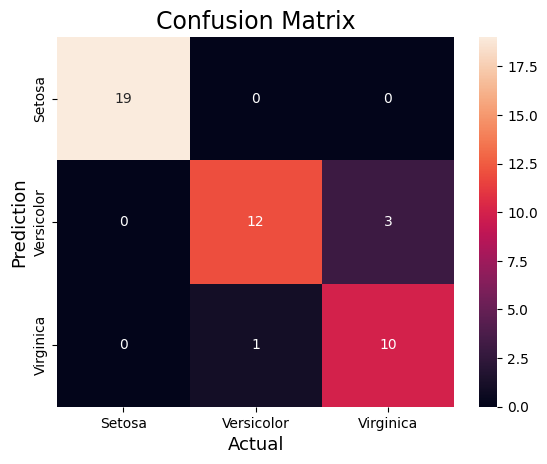

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Out of 19 Setosas, 19 have been correctly classified as Setosa. Out of 13 Versicolors, 12 have been correctly classified as Versicolor, and 1 have been wrongly classified as Virginica. Out of 13 Virginicas, 13 have been correctly classified as Virginica and 3 wrongly classified as Versicolors.

# K Nearest Neighbors (KNN)

Now, we are training the model with the help of the KNeighborsClassifier class of sklearn as follows:

In [42]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

Let us first test the accuracy of the KNN classifier for different K values over the training dataset.

In [43]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train,y_pred)
print("accuracy: ", accuracy)

accuracy:  0.9523809523809523


In [44]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [45]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train,y_pred)
print("accuracy: ", accuracy)

accuracy:  0.9523809523809523


In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [47]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train,y_pred)
print("accuracy: ", accuracy)

accuracy:  0.9619047619047619


In [48]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [49]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train,y_pred)
print("accuracy: ", accuracy)

accuracy:  0.9428571428571428


In [50]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [51]:
y_pred = classifier.predict(X_train)
accuracy = accuracy_score(y_train,y_pred)
print("accuracy: ", accuracy)

accuracy:  0.9428571428571428


Here, we have observed that the KNN algorithm is doing well for the values K = 8, 9, 10, and 11, 12 where it has achieved the highest accuracy of 96.19% at K = 10 on the training dataset.

Now, we have to make the prediction, which can be done in the following way:

# With test data

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=10)

In [53]:
y_pred = classifier.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)

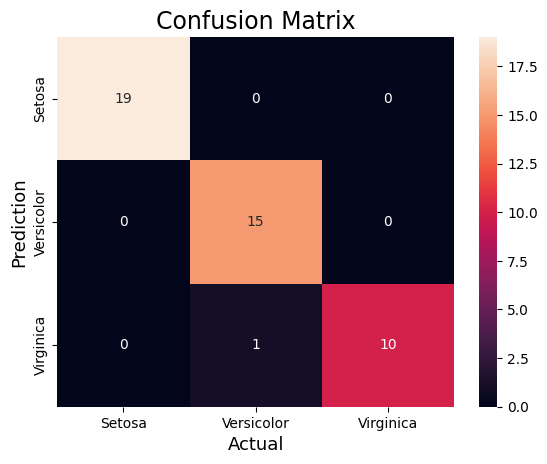

In [55]:
sns.heatmap(result,
            annot=True,
            fmt='g',
            xticklabels=['Setosa','Versicolor', 'Virginica'],
            yticklabels=['Setosa','Versicolor', 'Virginica'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Out of 19 Setosas, 19 have been correctly classified as Setosa. Out of 16 Versicolors, 15 have been correctly classified as Versicolor and 1 classified as Virginica. Out of 10 Virginicas, 10 have been classified as Virginica.



In [56]:
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.97        45
   weighted avg       0.98      0.98      0.98        45

Accuracy: 0.9777777777777777


In [57]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [58]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy: ", accuracy)



accuracy:  0.9777777777777777


In [59]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [60]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy: ", accuracy)

accuracy:  0.9555555555555556


Here, we have observed that the KNN algorithm is doing well for the values K = 9 and 10 where it has achieved the highest accuracy of 97.78% for the test dataset. There are no such differences in accuracy between training and test datasets while exploring KNN over it. Therefore, there is no scenario of overfitting or underfitting.

Find classification_report and confusion_matrix heatmap for other values of K